<br />
<br />

<center><h1><b>Lecture 15</b></h1></center>
<center><h1><b>Data Analysis and More Data Visualization with Python II</b></h1></center>

<center><h4>Time: M56 (13:20 ~ 15:10) and R2 (09:00 ~ 09:50)</h4></center>
<br />

<center><h2>Chieh-En Lee (李杰恩)</h2></center>

<center>
<h4><a href="mailto:celee@nycu.edu.tw">celee@nycu.edu.tw</a></h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs">Introduction to Computer and Computer Science</a>, 2024 Fall</h5></center>


## Last time

- Python package: Pandas and Matplotlib

## **Today**

<html>
<head>
</head>
<body>
<ul>
  <li><a href="#tag1">Errorbar</a></li>
  <li><a href="#tag2">Bar plot</a></li>
  <li><a href="#tag3">3D plotting</a></li>
  <li><a href="#tag4">Pie charts</a></li>
</ul>

</body>

## <a id="tag1">Errorbar</a>

- Plot $y$ versus $x$ as lines and/or markers with attached errorbars.

- [Documentation of Axes.errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html)  

- Syntax

```python
Axes.errorbar(
    x, y, yerr=None, xerr=None, fmt='', ecolor=None, 
    elinewidth=None, capsize=None, barsabove=False, 
    lolims=False, uplims=False, xlolims=False, xuplims=False, 
    errorevery=1, capthick=None, *, data=None, **kwargs
)
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# make data:
np.random.seed(87)
x = [3, 4, 5]
y = [9., 4., 8.7]
yerr = np.random.randn(3)

# plot:
fig = plt.figure(1, figsize=(4,3), dpi=100, layout="constrained", facecolor="w")
ax = fig.add_subplot(111)

ax.errorbar(
    x, 
    y, 
    yerr, 
    fmt='o', 
    linewidth=2, 
    capsize=3,
)

ax.grid(True)
ax.set(
    title="Example of Errorbar",
    xlabel="x",
    ylabel="y",
)

plt.show()

### Average grade of each homework assignment

- In another universe, there is a teacher who wants to know the learning status of his students, so he wants to sort out his homework scores for each semester and try to observe some clues. In order to help him, we will need to plot the average grade of each assignment in the past years into a chart.

    1. Calculate and plot the average grade of each homework
    2. Use the standard deviation as the error bar of each data point
    3. If we are lucky, we might find something.

- The data is here: `Lecture15/data/data_nycudopcs.xlsx`. First, let's take a look at what it has.

In [ ]:
import pandas as pd

data = pd.read_excel(
    "./data/data_nycudopcs.xlsx", 
    sheet_name = None,
)

for idx, df in enumerate(data):
    print(df)
    print(data[df])
    # print(data[df].columns)
    print("="*100)



#### Plot the data of 108A

- Once we know what the material has, we can choose a specific semester to plot.

In [ ]:
# Plot the data of 108A
data_108 = pd.read_excel("./data/data_nycudopcs.xlsx", sheet_name="108A")

x = np.arange(len(data_108.columns[1:]))

fig = plt.figure(1, figsize=(7,4), dpi=100, layout="constrained", facecolor="w")
ax = fig.add_subplot(111)

ax.errorbar(
    x = x, 
    y = data_108.iloc[0][1:], 
    yerr = data_108.iloc[1][1:], 
    label = r"Grade of 108A with $\pm 1$ STD",
    capsize = 2,
    marker = ".",
    linestyle = "dotted",
)

xmin, xmax = ax.get_xlim()
ax.hlines(
    y = [100],
    xmin = xmin,
    xmax = xmax,
    colors = "r",
    linestyles = "dashed",
)
ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 140])
ax.set_xticks(x)
ax.set_xticklabels(
    data_108.columns[1:], 
    fontdict={
        'horizontalalignment': 'center',
        "rotation": 45,
    }
)
ax.legend(loc="best")
ax.grid(True)

plt.show()

#### Plot all

- It would be more convenient if we plot all the data.

- We can write a function to iteratively plot the data.

In [81]:
def plotGrade(data):
    fig = plt.figure(1, figsize=(7,4), dpi=100, layout="constrained", facecolor="w")
    ax = fig.add_subplot(111)

    for idx, df in enumerate(data):
        currentDF = data[df]
        x = np.arange(len(currentDF.columns[1:]))

        ax.errorbar(
            x = x + 0.1*(idx-1), 
            y = currentDF.iloc[0][1:], 
            yerr = currentDF.iloc[1][1:], 
            label = "Grade of {} with ".format(df) + r"$\pm 1$ STD",
            capsize = 2,
            marker = ".",
            linestyle = "dotted",
        )

    xmin, xmax = ax.get_xlim()
    ax.hlines(
        y = [100],
        xmin = xmin,
        xmax = xmax,
        colors = "r",
        linestyles = "dashed",
    )

    ax.set(
        xlim=(xmin, xmax),
        ylim=(0, 150),
        xticks=x,
        title="Average Grade of NYCUDOPCS",
    )
    ax.set_xticklabels(
        currentDF.columns[1:], 
        fontdict={
            'horizontalalignment': 'center',
            "rotation": 45,
        }
    )
    ax.legend(loc="best")
    ax.grid(True)

    plt.show()

In [ ]:
data = pd.read_excel(
    "./data/data_nycudopcs.xlsx", 
    sheet_name = None,
)

plotGrade(data)

## <a id="tag2">Bar plot</a>

### Vertical bar plot

- Make a bar plot.

- [Documentation of `Axes.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)  

- Syntax

```python
Axes.bar(
    x, height, width=0.8, bottom=None, *, 
    align='center', data=None, **kwargs
)
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plotBarV(data):
    colors = ("#84474B", "#8F6360", "#B97A77", "#DFCFCC")

    fig = plt.figure(1, figsize=(7,4), dpi=100, layout="constrained", facecolor="w")
    ax = fig.add_subplot(111)

    for idx, df in enumerate(data):
        currentDF = data[df]
        x = np.arange(len(currentDF.columns[1:]))

        rects = ax.bar(
            x=x + 0.25*(idx-1),
            width=0.2, 
            align="center",
            height=currentDF.iloc[0][1:],
            color=colors[idx],
            label="{}".format(df),
        )

        large_bars = ["{:.0f}".format(v) if v > 60 else '' for v in currentDF.iloc[0][1:]]
        small_bars = ["{:.0f}".format(v) if v <= 60 else '' for v in currentDF.iloc[0][1:]]

        ax.bar_label(
            container=rects,
            labels=large_bars,
            padding=5,
            color='b',
            fontweight='bold',
            fontsize=8,
            rotation=90,
        )
        ax.bar_label(
            container=rects,
            labels=small_bars,
            padding=5,
            color='r',
            fontweight='bold',
            fontsize=8,
            rotation=90,
        )

    xmin, xmax = ax.get_xlim()
    ax.set(
        xlim=(xmin, xmax),
        xticks=x,
        ylim=(0, 150),
        yticks=np.arange(0, 150, 10),
    )
    ax.set_xticklabels(
        currentDF.columns[1:], 
        fontdict={
            'horizontalalignment': 'center',
            "rotation": 45,
        }
    )
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.vlines(np.arange(-.5, 12, 1), ymin=0, ymax=150, colors="k", alpha=.25, linestyle='--', linewidth=1)
    # ax.axhline(60, color='r', alpha=0.25)
    ax.legend(loc="upper left", ncols=3)
    
    plt.show()

plotBarV(data)

### Horizontal bar plot

- Make a horizontal bar plot..

- [Documentation of `Axes.barh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html)  

- Syntax

```python
Axes.barh(
    y, width, height=0.8, left=None, *, 
    align='center', data=None, **kwargs
)
```

- - -

### Exercise 15.1

- Please transform the above vertical bar plot into horizontal bar plot like this image.

![img](./assets/exercise1.png)

- - -

## <a id="tag3">3D plotting</a>

### Plot 2D data on 3D plot

- First, we have to create a 3D figure (a `Axes3D` object) via `projection`.

- [Documentation of `Axes3D.plot`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot.html)  

- Syntax

```python
Axes3D.plot(xs, ys, *args, zdir='z', **kwargs)

# How to create?
ax3d = matplotlib.pyplot.figure().add_subplot(projection='3d')
```


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)

np.random.seed(19890604)
x2 = np.random.sample(64)
y2 = np.random.sample(64)

fig = plt.figure(figsize=(10,4), dpi=100)

# Create a 2D plot
ax1 = fig.add_subplot(121)
ax1.plot(x, y, label=r"sin(2$\pi$x)")
ax1.scatter(x2, y2, c="r", marker="^")
ax1.set(
    xlim=(0, 1),
    ylim=(-1,1),
    xlabel=r"$x$",
    ylabel=r"$y$",
)
ax1.legend()

# Create a 3D plot
ax2 = fig.add_subplot(122, projection='3d')

# zs=0, zdir='z'
ax2.plot(xs=x, ys=y, zs=0, zdir='z', color="b", label=r'y = sin(2$\pi$x)')
# zs=0.5, zdir='z'
ax2.plot(xs=x, ys=y, zs=0.5, zdir='z', color="g", label=r"y = sin(2$\pi$x)")
# zs=0, zdir='y'
ax2.plot(xs=x, ys=y, zs=0, zdir='y', color="r", label=r"y = sin(2$\pi$x)")
# zs=0, zdir='x'
ax2.plot(xs=x, ys=y, zs=0, zdir='x', color="k", label=r"y = sin(2$\pi$x)")

ax2.set(
    xlim=(0, 1),
    ylim=(-1,1),
    zlim=(0, 1),
    xlabel=r"$x$",
    ylabel=r"$y$",
    zlabel=r"$z$",
)
ax2.legend()

ax2.view_init(elev=30, azim=30, roll=0)

plt.show()

- - -

### Exercise 15.2

- In our previouse 3D plot, we didn't plot the scatters shown in the left subplot. Please plot those scatters in your 3D plot.

- You may want to try different parameters (`zs` and `zdir`).

- - -

### Plot a surface and contours on 3D plot

- We have learned how to plot 2D contours. It is time to learn how to plot a 3D surface and its corresponding projection on a 3D plot.

- [Documentation of `Axes3D.plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html)  

- Syntax

```python
Axes3D.plot_surface(
    X, Y, Z, *, norm=None, 
    vmin=None, vmax=None, lightsource=None, **kwargs
)
```

- For example, to plot the surface of function $f(x,y)$ in the region $x \in [-3, 3]$ and $y \in [-3, 3]$:

$$
f(x, y) = (1- \frac{x}{2} + x^3 + y^5) \cdot \exp{-(x^2 +y^2)}
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.transforms as mtransforms

def add_right_cax(ax, pad, width):
    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1,
    )
    cax = ax.figure.add_axes(caxpos)
    return cax

# Prepare the data
L = 3
x = np.linspace(-L, L, 501)    # Create a 1D array, shape: (501,)
y = np.linspace(-L, L, 501)    # Create a 1D array, shape: (501,)
X, Y = np.meshgrid(x, y)       # Create two 2D arrays, shape: (501, 501)
Z = (1 - X/2 + X**3 + Y**5) * np.exp(-(X**2 + Y**2))  # Create a 2D array Z = f(X, Y)
lv = np.linspace(np.min(Z), np.max(Z), 20)

fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax1.contour(X, Y, Z, levels=lv, cmap='coolwarm')
ax1.set(
    xlim=(-L, L), 
    ylim=(-L, L), 
    xlabel="X", 
    ylabel="Y", 
    title="2D Contour Map, XY-plane",
)

ax2 = fig.add_subplot(122, projection='3d')
# Plot the 3D surface
surf = ax2.plot_surface(
    X, Y, Z, 
    cmap="jet",
    # edgecolor='royalblue',   # linecolor
    lw=0.5,                  # linewidth 
    rstride=32, 
    cstride=32, 
    alpha=0.3,
)
cax2 = add_right_cax(ax=ax2, pad=0.05, width=0.02)
cbar2 = fig.colorbar(mappable=surf, cax=cax2)
# Plot the 2D contours on 3D plot
ax2.contour(X, Y, Z, zdir='z', stride=32, offset=np.min(Z), cmap='coolwarm', levels=lv)
ax2.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap='coolwarm', levels=lv, alpha=0.5)
ax2.set(
    xlim=(-L, L), 
    ylim=(-L, L), 
    zlim=(np.min(Z), np.max(Z)),
    xlabel='X', 
    ylabel='Y', 
    zlabel='Z',
    title="3D Surface and Contour",
)

plt.show()

- - -

### Exercise 15.3

- Please plot the surface of function $f(x,y)$:

$$
f(x, y) = 8 \cdot x \cdot y \cdot \exp{ \lbrace (x^2 + y^2) \rbrace } 
$$

![img](./assets/exercise3.png)

- - -

## <a id="tag4">Pie charts</a>

- Plot a pie chart.

- [Documentation of `Axes.pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html)  

- Syntax

```python
Axes.pie(
    x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, 
    shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, 
    wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, 
    *, normalize=True, hatch=None, data=None
)
```

In [ ]:
import matplotlib.pyplot as plt

labels = ['Cats', 'Lions', 'Leopards', 'Tigers']
sizes = [15, 30, 45, 10]

fig = plt.figure(figsize=(12,4), dpi=100)

ax1 = fig.add_subplot(131)
ax1.pie(
    x=sizes, 
    labels=labels
)

# Add the percent size in wedge
ax2 = fig.add_subplot(132)
ax2.pie(
    x=sizes, 
    labels=labels,
    autopct=lambda s: "{:.1f}%".format(s),
    pctdistance=0.6,
    labeldistance=1.1,
)

# Swap the percentage and wedge labels
ax3 = fig.add_subplot(133)
ax3.pie(
    x=sizes, 
    labels=labels,
    autopct=lambda s: "{:.1f}%".format(s),
    pctdistance=1.2,
    labeldistance=0.4,
)

plt.show()

### The batted ball of MLB

- In a baseball game, there are several situations when a batter hit a ball in play, including line drive (LD), ground ball (GB), fly ball (FB), pop-up (PU), safety bunt, sacrifice fly (SF), and others (the ball hit a umpire, ...).

- Typically, baseball statistics use three percentages, the line drive percentage (LD%), the ground ball percentage (GB%), and the fly ball percentage (FB%), to evaluate the basic batting statistica of a player or a team.

- In this example, we would like to plot a pie chart to summarize this.

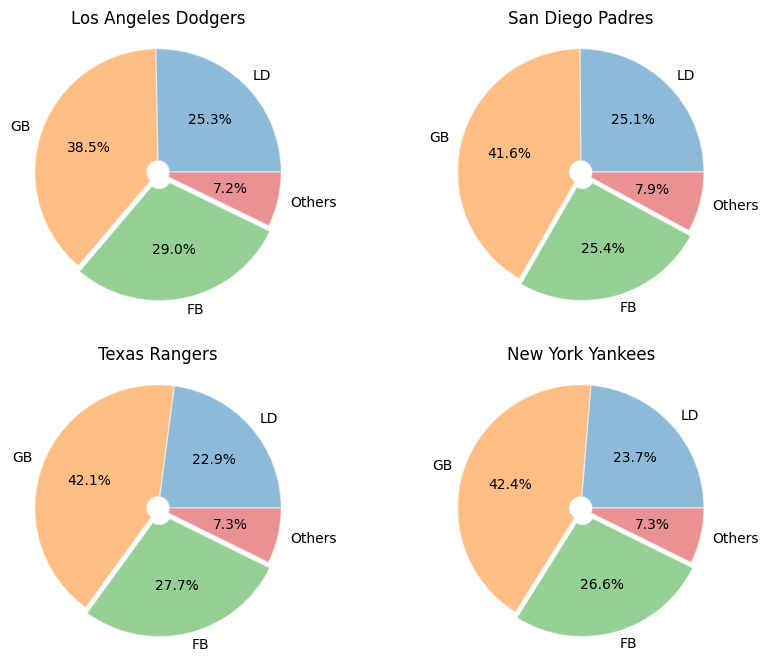

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./data/data_batting2024_team.csv")

teamList = [
    "Los Angeles Dodgers", 
    "San Diego Padres",
    "Texas Rangers",
    "New York Yankees",
]
labels = ['LD', 'GB', 'FB', 'Others']
explode = (0, 0, 0.05, 0)

fig = plt.figure(figsize=(10, 8), dpi=100)

for idx, team in enumerate(teamList):
    currentData = data[data["Tm"] == team]
    # Get LD%, GB%, FB% and transfer to float
    battedBall = [
        float(currentData["LD%"].to_list().pop().split(sep="%")[0]),  # LD%
        float(currentData["GB%"].to_list().pop().split(sep="%")[0]),  # GB%
        float(currentData["FB%"].to_list().pop().split(sep="%")[0]),  # FB%
    ]
    # Calculate the others
    battedBall.append(100 - sum(battedBall))

    ax = fig.add_subplot(2, 2, idx+1)
    
    ax.pie(
        x=battedBall, 
        labels=labels,
        explode=explode,
        # shadow=True,
        radius=1.1,
        autopct=lambda s: "{:.1f}%".format(s),
        pctdistance=0.6,
        labeldistance=1.1,
        wedgeprops={
            "linewidth": 1, 
            "edgecolor": "white",
            "alpha": 0.5,
            "width": 1.,
        },
    )

    ax.set_title(team)

plt.show()


### Pie charts with bar

- Sometimes, we would like to further investigate one of the wedges of a pie chart. In this case, we can use a bar plot to demonstrate its characteristics.

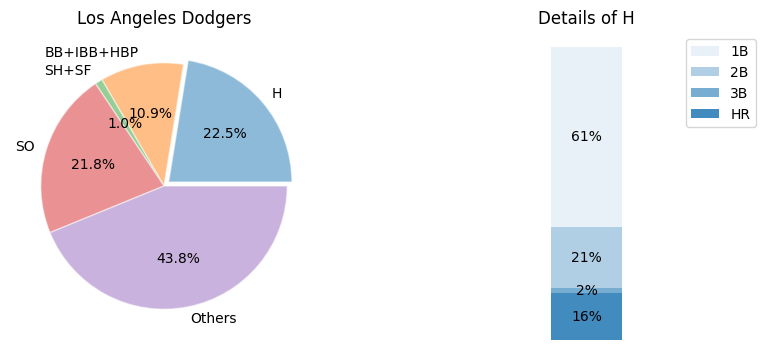

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./data/data_batting2024_team.csv")

team = "Los Angeles Dodgers"
labels = ["H", "BB+IBB+HBP", "SH+SF", "SO", "Others"]
explode = (0.05, 0, 0, 0, 0)

fig = plt.figure(figsize=(10, 4), dpi=100)

currentData = data[data["Tm"] == team]
# Get H, BB+IBB+HBP, SH+SF, and SO
battedBall = [
    currentData["H"].to_numpy()[0],  # H
    currentData["BB"].to_numpy()[0] + currentData["IBB"].to_numpy()[0] + currentData["HBP"].to_numpy()[0],  # BB+IBB+HBP
    currentData["SH"].to_numpy()[0] + currentData["SF"].to_numpy()[0],  # SH+SF
    currentData["SO"].to_numpy()[0],  # SO
]
# Calculate the others
battedBall.append(currentData["PA"].to_numpy()[0] - sum(battedBall))

# Pie chart
ax = fig.add_subplot(1, 2, 1)
ax.pie(
    x=battedBall, 
    labels=labels,
    explode=explode,
    startangle=0,
    autopct=lambda s: "{:.1f}%".format(s),
    pctdistance=0.6,
    labeldistance=1.1,
    wedgeprops={
        "linewidth": 1, 
        "edgecolor": "white",
        "alpha": 0.5,
    },
)
ax.set_title(team)

# Get 1B, 2B, 3B, and HR
hList = [
    currentData["2B"].to_numpy()[0],
    currentData["3B"].to_numpy()[0],
    currentData["HR"].to_numpy()[0],
]
hList.insert(0, currentData["H"].to_numpy()[0] - sum(hList))
hList = hList/currentData["H"].to_numpy()[0]
hLabels = ['1B', '2B', '3B', 'HR']
bottom = 1
width = .2

# Bar plot
ax2 = fig.add_subplot(1, 2, 2)
for j, (height, label) in enumerate(zip(hList, hLabels)):
    bottom -= height
    bc = ax2.bar(
        0, 
        height, 
        width, 
        bottom=bottom, 
        color='C0', 
        label=label,
        alpha=0.1 + 0.25 * j,
    )

    ax2.bar_label(
        bc, 
        labels=["{:.0%}".format(height)], 
        label_type='center',
    )
    
ax2.set_title('Details of H')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

plt.show()

### Add bar via `matplotlib.transforms`

- To further control the position of bar (or other sub-figures), the `matplotlib.transforms` can provide a more compact result.

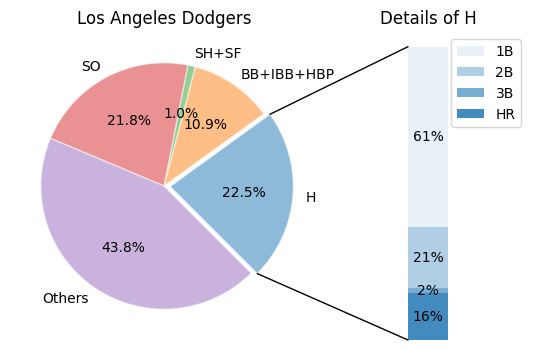

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.transforms as mtransforms
from matplotlib.patches import ConnectionPatch


def add_right_ax(ax, pad, width):
    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1,
    )
    right_ax = ax.figure.add_axes(caxpos)
    return right_ax


data = pd.read_csv("./data/data_batting2024_team.csv")

team = "Los Angeles Dodgers"
labels = ["H", "BB+IBB+HBP", "SH+SF", "SO", "Others"]
explode = (0.05, 0, 0, 0, 0)

fig = plt.figure(figsize=(10, 4), dpi=100)

currentData = data[data["Tm"] == team]
# Get H, BB+IBB+HBP, SH+SF, and SO
battedBall = [
    currentData["H"].to_numpy()[0],  # H
    currentData["BB"].to_numpy()[0] + currentData["IBB"].to_numpy()[0] + currentData["HBP"].to_numpy()[0],  # BB+IBB+HBP
    currentData["SH"].to_numpy()[0] + currentData["SF"].to_numpy()[0],  # SH+SF
    currentData["SO"].to_numpy()[0],  # SO
]
# Calculate the others
battedBall.append(currentData["PA"].to_numpy()[0] - sum(battedBall))

# Pie chart
ax1 = fig.add_subplot(1, 2, 1)
wedges, *_ = ax1.pie(
    x=battedBall, 
    labels=labels,
    explode=explode,
    startangle=-45,
    autopct=lambda s: "{:.1f}%".format(s),
    pctdistance=0.6,
    labeldistance=1.1,
    wedgeprops={
        "linewidth": 1, 
        "edgecolor": "white",
        "alpha": 0.5,
    },
)
ax1.set_title(team)

# Get 1B, 2B, 3B, and HR
hList = [
    currentData["2B"].to_numpy()[0],
    currentData["3B"].to_numpy()[0],
    currentData["HR"].to_numpy()[0],
]
hList.insert(0, currentData["H"].to_numpy()[0] - sum(hList))
hList = hList/currentData["H"].to_numpy()[0]
hLabels = ['1B', '2B', '3B', 'HR']
bottom = 1
width = .2

ax2 = add_right_ax(ax=ax1, pad=0.01, width=0.2)
# Bar plot
for j, (height, label) in enumerate(zip(hList, hLabels)):
    bottom -= height
    bc = ax2.bar(
        0, 
        height, 
        width, 
        bottom=bottom, 
        color='C0', 
        label=label,
        alpha=0.1 + 0.25 * j,
    )

    ax2.bar_label(
        bc, 
        labels=["{:.0%}".format(height)], 
        label_type='center',
    )
    
ax2.set_title('Details of H')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(hList)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

plt.show()

## Reference

The data of this lecture is from [Baseball Reference](https://www.baseball-reference.com/).


<details><summary>Don't click this</summary>

<details><summary>Exercise 15.1</summary>

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotBarH(data):
    colors = ("#84474B", "#8F6360", "#B97A77", "#DFCFCC")

    fig = plt.figure(1, figsize=(5,6), dpi=100, layout="constrained", facecolor="w")
    ax = fig.add_subplot(111)

    for idx, df in enumerate(data):
        currentDF = data[df]
        x = np.arange(len(currentDF.columns[1:]))

        rects = ax.barh(
            y=x + 0.25*(idx-1),
            width=currentDF.iloc[0][1:], 
            align="center",
            height=0.2,
            color=colors[idx],
            label="{}".format(df),
        )

        large_bars = ["{:.0f}".format(v) if v > 60 else '' for v in currentDF.iloc[0][1:]]
        small_bars = ["{:.0f}".format(v) if v <= 60 else '' for v in currentDF.iloc[0][1:]]

        ax.bar_label(
            container=rects,
            labels=large_bars,
            padding=-20,
            color='w',
            fontweight='bold',
            fontsize=8,
        )
        ax.bar_label(
            container=rects,
            labels=small_bars,
            padding=5,
            color='r',
            fontweight='bold',
            fontsize=8,
        )

    ymin, ymax = ax.get_ylim()
    ax.set(
        xlim=(0, 150),
        xticks=np.arange(0, 150, 10),
        ylim=(ymin, ymax),
        yticks=x,
    )
    ax.set_yticklabels(
        currentDF.columns[1:], 
        fontdict={
            'verticalalignment': 'center',
            "rotation": 0,
        }
    )
    ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.hlines(np.arange(-.5, 12, 1), xmin=0, xmax=150, colors="k", alpha=.25, linestyle='--', linewidth=1)
    ax.legend(loc="lower right", ncols=1)
    
    plt.show()

data = pd.read_excel(
    "./data/data_nycudopcs.xlsx", 
    sheet_name = None,
)

plotBarH(data)
```
</details>


<details><summary>Exercise 15.3</summary>

```python
import matplotlib.pyplot as plt
import numpy as np

L = 2
x = np.linspace(-L, L, 501)    # Create a 1D array, shape: (501,)
y = np.linspace(-L, L, 501)    # Create a 1D array, shape: (501,)
X, Y = np.meshgrid(x, y)       # Create two 2D arrays, shape: (501, 501)
Z = 8 * X * Y * np.exp(-(X**2 + Y**2))
lv = np.linspace(np.min(Z), np.max(Z), 20)

fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
im1 = ax1.contourf(X, Y, Z, levels=lv, cmap='jet')
ax1.set(
    xlim=(-L, L), 
    ylim=(-L, L), 
    xlabel="X", 
    ylabel="Y", 
    title="2D Contour Map, XY-plane",
)
cax1 = add_right_cax(ax=ax1, pad=0.01, width=0.02)
cbar1 = fig.colorbar(mappable=im1, cax=cax1)

ax2 = fig.add_subplot(122, projection='3d')
# Plot the 3D surface
surf = ax2.plot_surface(
    X, Y, Z, 
    edgecolor='royalblue', 
    cmap="jet",
    lw=0.2, 
    rstride=32, 
    cstride=32, 
    alpha=0.3,
)

ax2.contour(X, Y, Z, zdir='z', stride=32, offset=np.min(Z), cmap='coolwarm', levels=lv)
# ax2.contourf(X, Y, Z, zdir='x', offset=-L, cmap='jet', levels=lv)
# ax2.contourf(X, Y, Z, zdir='y', offset=L, cmap='jet', levels=lv)

ax2.set(
    xlim=(-L, L), 
    ylim=(-L, L), 
    zlim=(np.min(Z), np.max(Z)),
    xlabel='X', 
    ylabel='Y', 
    zlabel='Z',
    title="3D Surface and Contour",
)
cax2 = add_right_cax(ax=ax2, pad=0.05, width=0.02)
cbar2 = fig.colorbar(mappable=surf, cax=cax2)

plt.show()
```

</details>


</details>